In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import d2d
import importlib
importlib.reload(d2d)

from datetime import datetime
import pickle as pkl
import json

In [2]:
n = 25000  # The size of the validation set in each fold.

# Load the model definitions and datasets
linear_model, lstm_model, dnn_model, df_all_chan,input_columns  = d2d.import_data()
# names = ('Multistep_Linear','Multistep_DNN','Multistep_LSTM')
names = ('Multistep_LSTM')
models = [lstm_model]

'''
Run the analysis
'''
val_performance, performance, history, history_dict \
    = d2d.k_fold(n,names,models,df_all_chan,input_columns,early_stop = 1)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
Epoch 1/20
1174/1174 [==============================] - 150s 127ms/step - loss: 0.0548 - mean_absolute_error: 0.1472 - val_loss: 0.9786 - val_mean_absolute_error: 0.7922
Epoch 2/20
1174/1174 [==============================] - 133s 113ms/step - loss: 0.0113 - mean_absolute_error: 0.0773 - val_loss: 1.0775 - val_mean_absolute_error: 0.8276
Epoch 3/20
1174/1174 [==============================] - 131s 112ms/step - loss: 0.0089 - mean_absolute_error: 0.0683 - val_loss: 1.1357 - val_mean_absolute_error: 0.8359
Epoch 4/20
1174/1174 [==============================] - 131s 111ms/step - loss: 0.0082 - mean_absolute_error: 0.0654 - val_loss: 1.4845 - val_mean_absolute_error: 0.9945
Epoch 5/20
1174/1174 [==============================] - 130s 111ms/step - loss: 0.0065 - mean_absolute_error: 0.0574 - val_loss: 1.1365 - val_mean_absolute_error: 0.8542
Epoch 6/20
463/463 [==============================] - 27s 45ms/step - loss: 1.0232 - mean_abso

# Goal is to debug "Why are the loss curves so bad"

What is the effect of:
1. Learning rate
2. Number of epochs / batch size
3. Network architecture: number of layers, addition of dropout layers?
4. probably more things...

### Plotting of loss curves.

In [3]:
print(history_dict)

{'M_fold0_loss': [0.05482378974556923, 0.01127141248434782, 0.008944124914705753, 0.00822044350206852, 0.006528238300234079, 0.007097940426319838], 'M_fold0_val_loss': [0.9786209464073181, 1.0774829387664795, 1.1357290744781494, 1.484478235244751, 1.1365052461624146, 1.0232386589050293]}


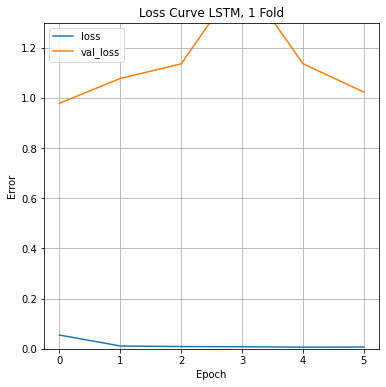

In [6]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(6,6), facecolor='w', edgecolor='k')

plt.plot(history_dict['M_fold'+str(0)+'_loss'], label='loss')
plt.plot(history_dict['M_fold'+str(0)+'_val_loss'], label='val_loss')
plt.ylim([0, 1.3])
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.title("Loss Curve LSTM, 1 Fold")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

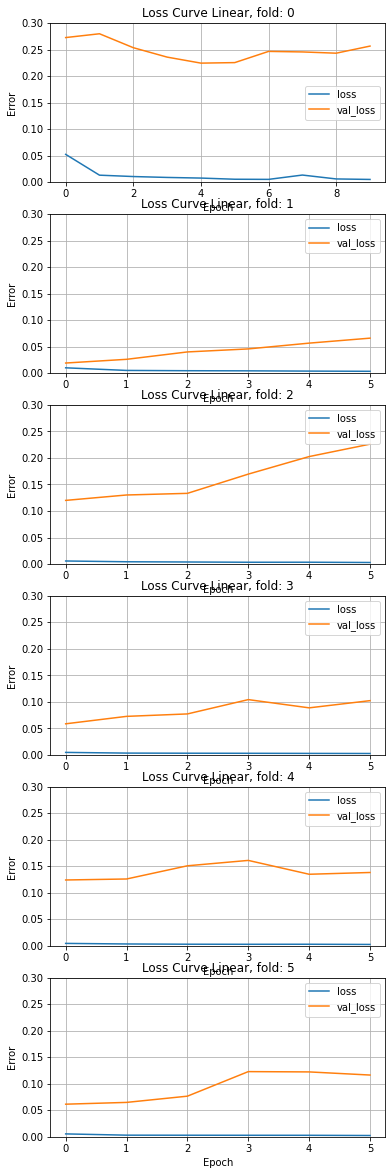

In [40]:
import matplotlib.pyplot as plt
a=1
fig = plt.figure(figsize=(6,24), facecolor='w', edgecolor='k')
for k in range(0,6):

    #Linear model
    
    plt.subplot(7, 1, a)
    plt.clf
    plt.plot(history_dict['M_fold'+str(k)+'_loss'], label='loss')
    plt.plot(history_dict['M_fold'+str(k)+'_val_loss'], label='val_loss')
    plt.ylim([0,.3])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.title("Loss Curve Linear, fold: "+str(k))
    a += 1

plt.tight_layout()
plt.show